# Testing model fit with 3D molecule orientation

In [1]:
import os
import sys

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

## For colorbar |
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

module_path = os.path.abspath(os.path.join(
    '..', 
    "..", 
    "..",
    ".."))
sys.path.append(module_path)
## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib

In [2]:
os.getcwd()

'/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/gitted/nanodisk_notebooks/modeling_experiment/disk_simulation'

In [3]:
## Parameter setting needs to be in cell following mpl import for some reason 
## https://github.com/jupyter/notebook/issues/3385
##
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
#     'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)

In [4]:
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m


eps_b = 1.778 ## Water
cm_per_nm = 1E-7

hres_obs_pts = diffi.observation_points(
    -480*cm_per_nm, 480*cm_per_nm, -480*cm_per_nm, 480*cm_per_nm, 201)

## Compare the mol fields between the simulation and model for z oriented 

In [5]:
param_file = 'disk_70nm'
disk_radius = 70/2

## Set molecule positions 
num_per_arc = 3
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
2th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
3th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
Calculating Gaussian centroid with analytic images


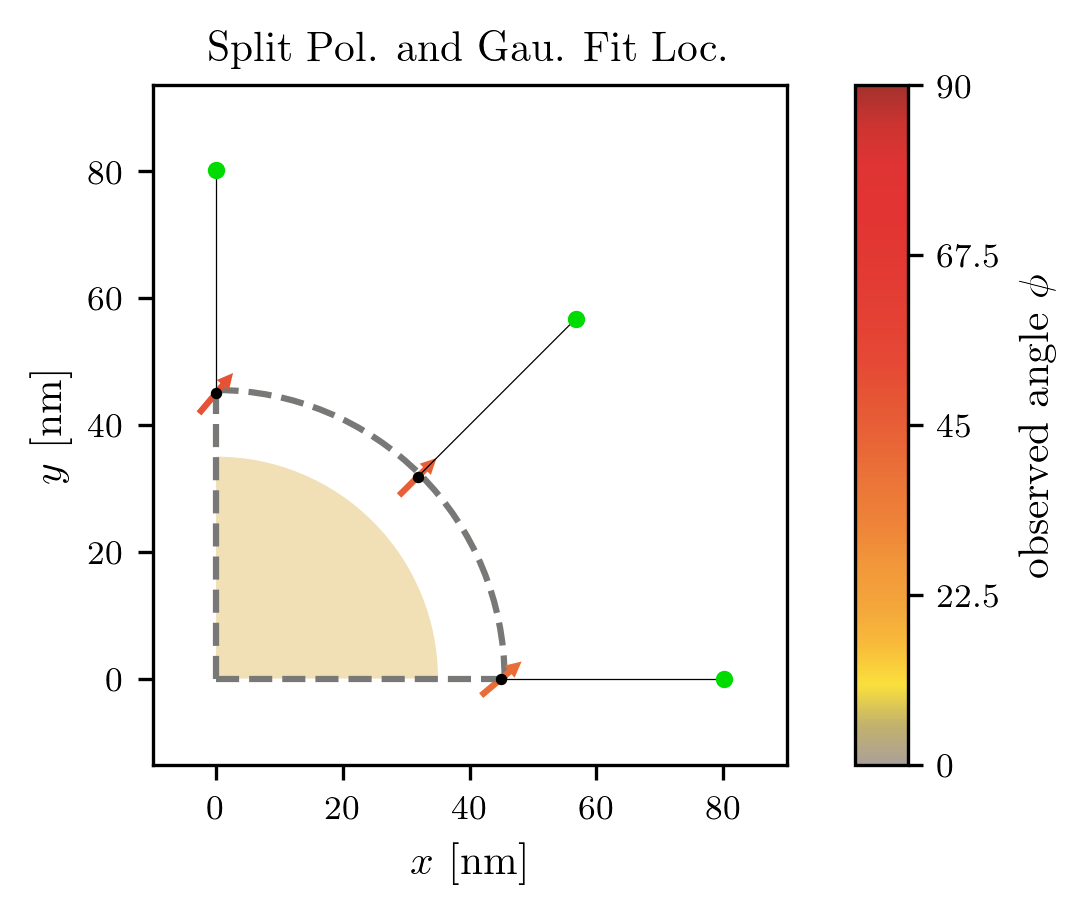

In [17]:
## Define molecule localtions
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

## Align molecules in focal plane in x
mol_angles = np.array([[0, 0]])
# mol_angles = 0

## Build model
model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=mol_angles,
    param_file=param_file,
    for_fit=True ## This turns off auto_quenching
    )

## Build simulation
sim_inst = bem.SimulatedExperiment(
    locations=locations, 
    mol_angle=mol_angles,
    param_file=param_file,
    simulation_file_name='CurlyDiskJC_NoSub_dipDrive_E',
    auto_quench=False
    )
sim_inst.calculate_BEM_fields()
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

In [6]:
data_dir = 'sim_inst_disk70nm_sep10nm_021021'

In [20]:
sim_inst.mispol_angle=0
bem.save_sim_exp_inst(sim_inst, data_dir_name=data_dir)

In [7]:
sim_inst = bem.LoadedSimExp(data_dir, param_file)

Check the image and see if it looks pz like

Try a fit

In [8]:
fit_inst = fit.FitModelToData(
    sim_inst.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
## Start fit
the_fit = fit_inst.fit_model_to_image_data(
    check_ini=False,
    let_mol_ori_out_of_plane=True)

## Plot fit results
## This will break for molecules out of plane if fit is not 3D
fit_inst.plot_fit_results_as_quiver_map(sim_inst)  


 initial guess for molecule 0 location: (21.487986917176876,-0.0625472787122835)
initialized params = [21.487986917176876, -0.0625472787122835, 1.5510698404039558, 0.762370545270004]
about to fit with initial params = [21.487986917176876, -0.0625472787122835, 1.5510698404039558, 0.762370545270004]


KeyboardInterrupt: 

In [ ]:
fit_inst = fit.FitModelToData(
    sim_inst.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
## Start fit
the_fit = fit_inst.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

## Plot fit results
## This will break for molecules out of plane if fit is not 3D
fit_inst.plot_fit_results_as_quiver_map(sim_inst)  

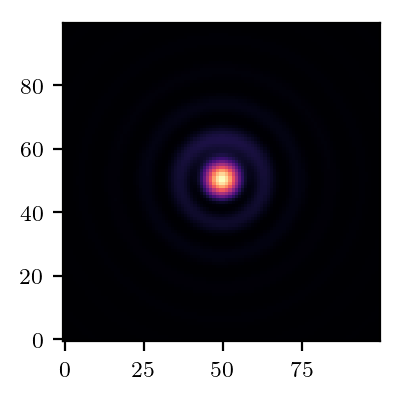

In [25]:
plt.imshow(sim_inst.BEM_images[0].reshape((100,100)))

In [38]:
a_sim_image = sim_inst.BEM_images[0].reshape((100,100))
the_fit_image = fit_inst.raveled_model_of_params(
    [21.487986917176876, -0.0625472787122835, 1.1021285346734027, 0.7137990388048312]
    ).reshape((100, 100))
## Normalize
a_sim_image /= a_sim_image.max()
the_fit_image /= the_fit_image.max()

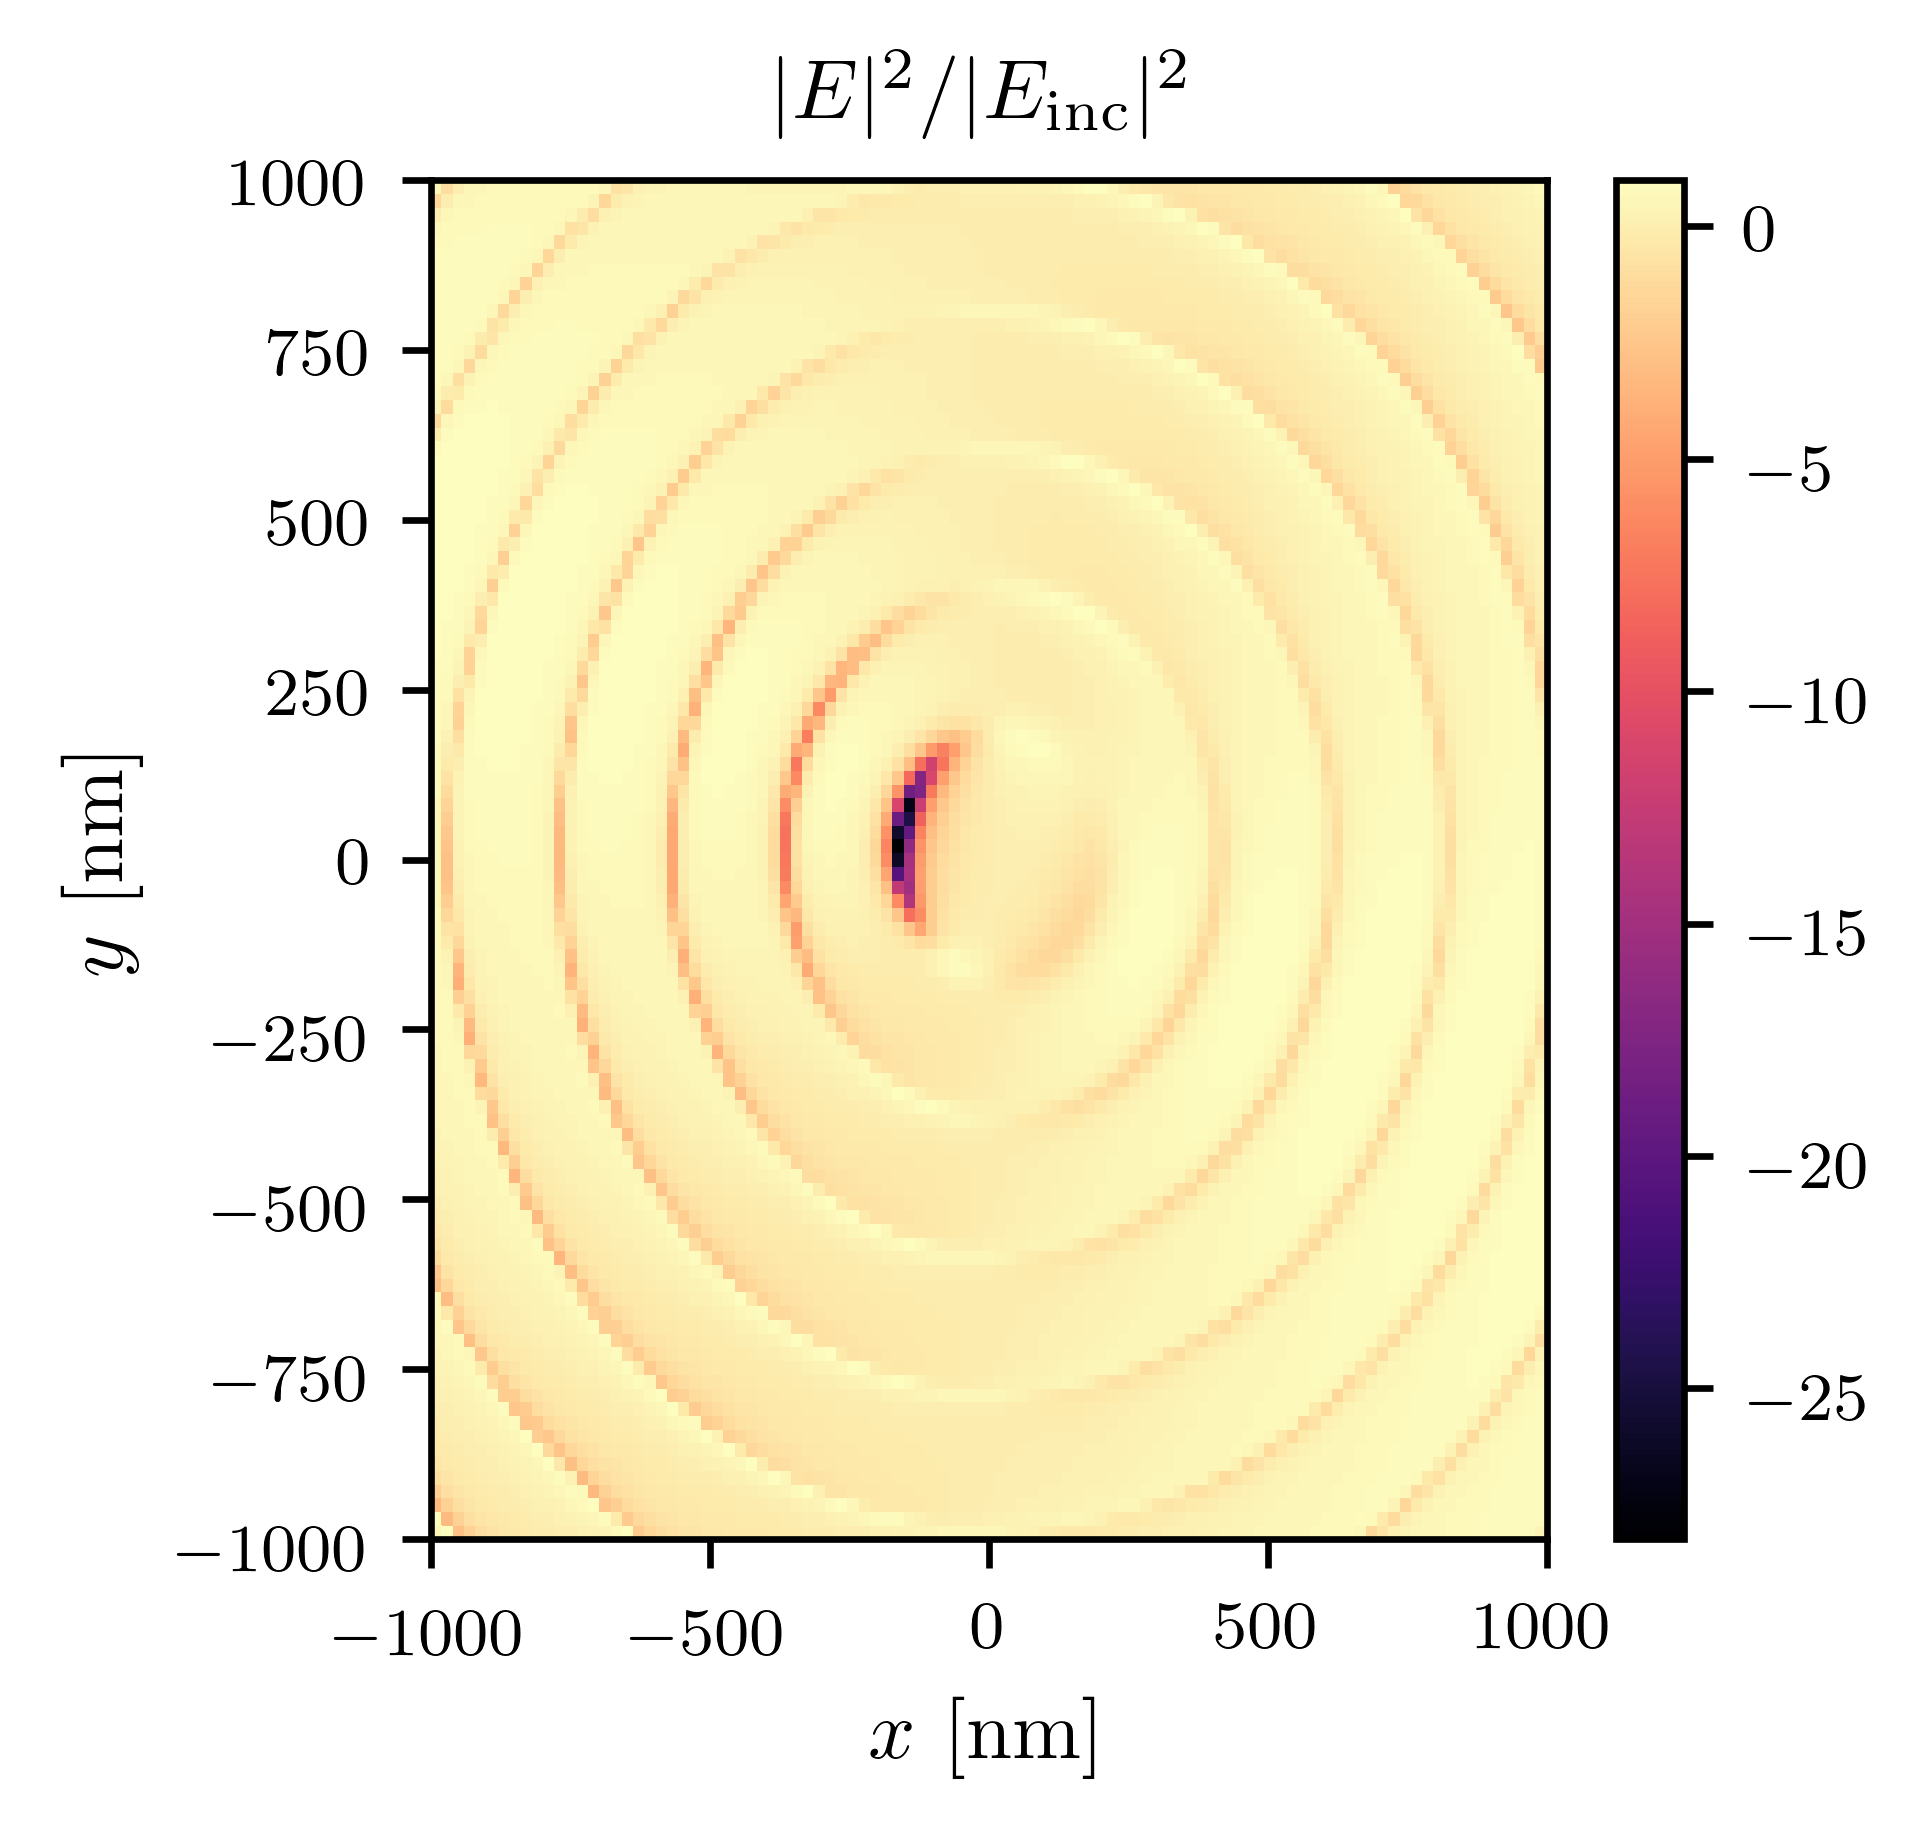

In [41]:
fit_inst.plot_raveled_image((a_sim_image-the_fit_image)/a_sim_image)


 initial guess for molecule 0 location: (21.487986917176876,-0.0625472787122835)
initialized params = [21.487986917176876, -0.0625472787122835, 1.4855555756973773, 1.1912421608329433]
Checking inital guess
self.rod_angle,  1.5707963267948966 
 ini_x,  21.487986917176876 
 ini_y,  -0.0625472787122835 
 self.quench_radius_a_nm,  35.0 
 self.quench_radius_c_nm,  35.0 

In quenching zone? True
Initial guess in quench. Zone, OG params: [21.487986917176876, -0.0625472787122835, 1.4855555756973773, 1.1912421608329433]
Params shifted to: [34.99985172748105, -0.10187764397498716, 1.4855555756973773, 1.1912421608329433]
about to fit with initial params = [34.99985172748105, -0.10187764397498716, 1.4855555756973773, 1.1912421608329433]
Resulting fit params: [ 0.6701277  -0.05745548  3.09766167 -0.22104357]
but now they are: [34.99985172748105, -0.10187764397498716, 1.4855555756973773, 1.1912421608329433]
Begin try 2...
about to fit with initial params = [34.99985172748105, -0.10187764397498716, 

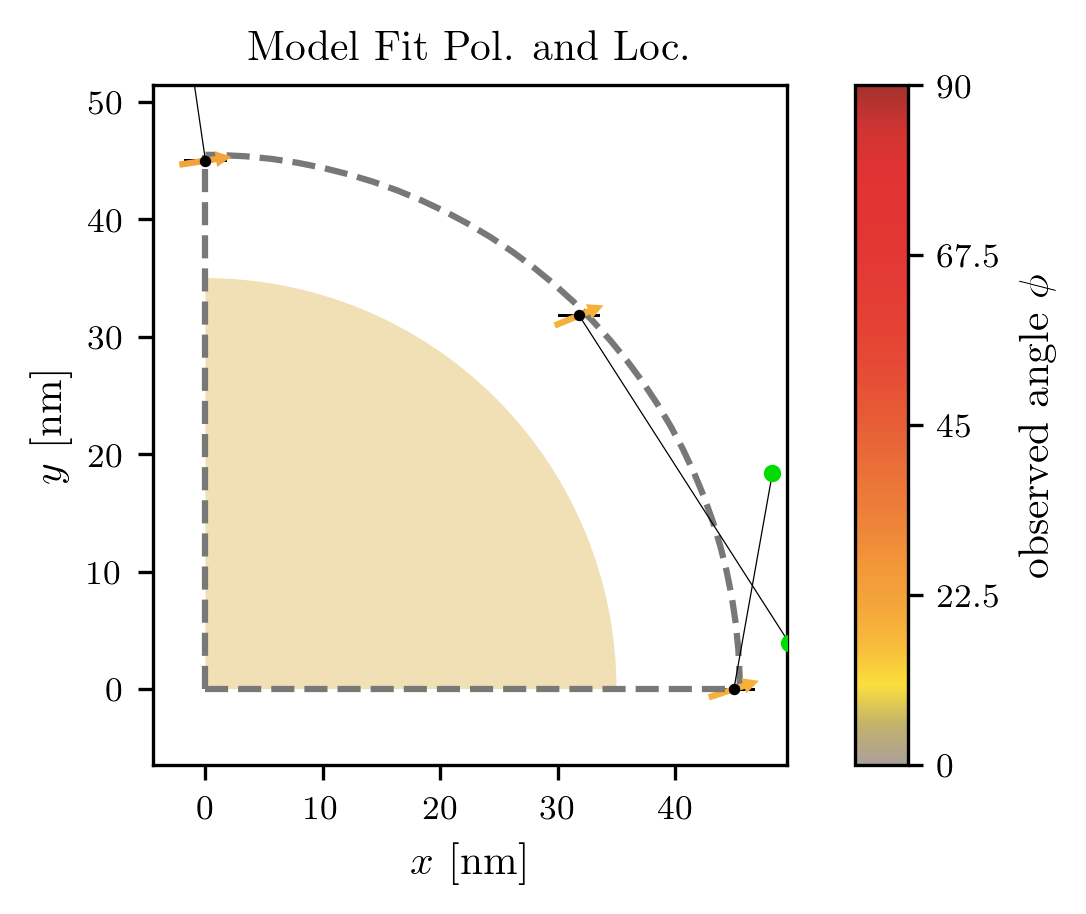

In [9]:
fit_inst = fit.FitModelToData(
    sim_inst.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
## Start fit
the_fit = fit_inst.fit_model_to_image_data(
    check_ini=True,
    check_fit_loc=True,
    let_mol_ori_out_of_plane=True)

## Plot fit results
## This will break for molecules out of plane if fit is not 3D
fit_inst.plot_fit_results_as_quiver_map(sim_inst)  